In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def reconstruct_with_sinc(ts,fd,t): 
    n, = ts.shape 
    dt = ts[1] - ts[0] 
    fr = [] 
    for k,ti in enumerate(t): 
        # for each time point 
        sumf = 0.0 
        for i in range(n): 
        # for each point in a sampled set 
            sumf += fd[i]*np.sin(np.pi*(ti/dt-i))/(ti/dt-i) 
        
        fr.append((1./np.pi)*sumf) 
        
    return np.asarray(fr) 
    

In [2]:
t = np.arange(0.0,0.6,0.001) 
fa = 1.0*np.sin(2*np.pi*10*t)+0.2*np.sin(2*np.pi*6*t) 
fs = 30 # Hz 
ts = np.arange(0.0,0.6,1./fs) # sampling time 
fd = 1.0*np.sin(2*np.pi*10*ts)+0.2*np.sin(2*np.pi*6*ts) # sampled data

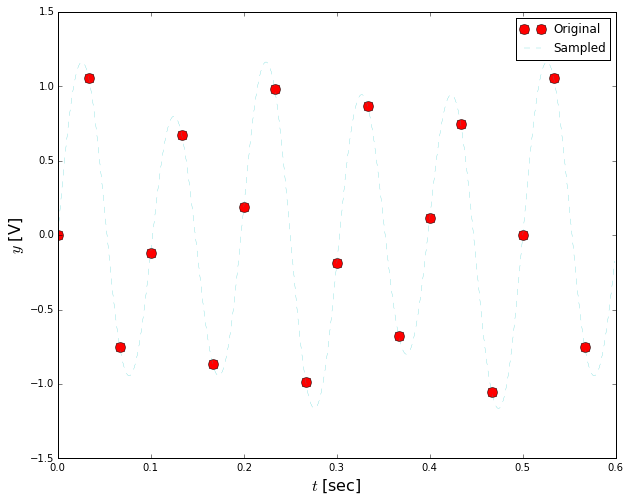

In [3]:
plt.figure(figsize=(10,8)) 
plt.plot(ts,fd,'ro',markersize=10)
plt.plot(t,fa,'c--',linewidth=0.2)
plt.xlabel('$t$ [sec]',fontsize=16) 
plt.ylabel('$y$ [V]',fontsize=16) 
plt.legend(('Original','Sampled')) 

In [4]:
fr = reconstruct_with_sinc(ts,fd,t) 

/Users/alex/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


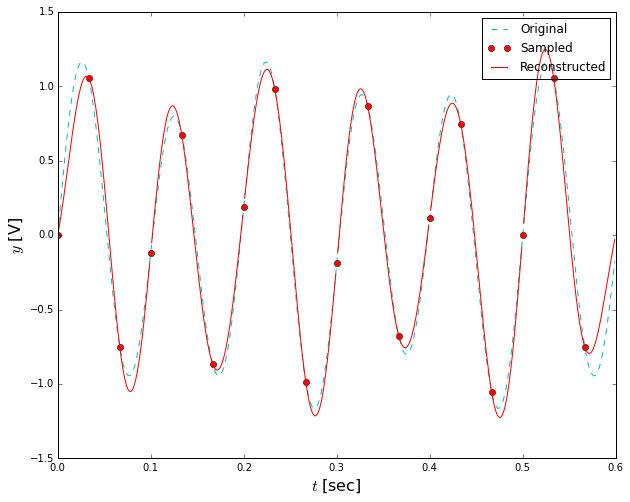

In [5]:
plt.figure(figsize=(10,8)) 
plt.plot(t,fa,'c--',ts,fd,'ro',t,fr,'r-')
plt.xlabel('$t$ [sec]',fontsize=16) 
plt.ylabel('$y$ [V]',fontsize=16) 
plt.legend(('Original','Sampled','Reconstructed')) 